# Theory

In [60]:
import numpy as np

from scipy.optimize import minimize

import matplotlib.pyplot as plt
import seaborn
seaborn.set_style("darkgrid")

## Generating a sample

The probability density function of the univariate Gaussian is given by:

$$f(x | \mu, \sigma^{2}) = \frac{1}{\sqrt{2\pi \sigma^{2}}}e^{-\frac{1}{2\sigma^{2}}(x - \mu)^{2}}$$

[-6.   -5.99 -5.98 ...  5.97  5.98  5.99]
Shape: (500,)


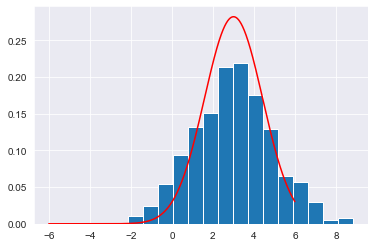

In [214]:
# set the random seed
rng = np.random.default_rng(42)
# generate a sample of normally distributed random variables with mean mu and variance var
mu = 3
var = 2
# generate a random sample using the numpy function
sample = rng.normal(mu, var, 500)

def pdf(x, mu, var):
    """
        Return a vector (shape of x) of the probabilities
        of the values of x
    """
    return 1 / (np.sqrt(2*np.pi*var)) * np.exp(-1/(2*var)*(x - mu)**2)

xx = np.arange(-6, 6, 0.01)

print(xx)
probs = pdf(xx, mu, var)

print(f"Shape: {sample.shape}")

plt.hist(sample, bins=15, density=True);
plt.plot(xx, probs, c='red')

## Maximum Likelihood Estimation

Here we minimise the likelihood function for the univariate Gaussian pdf. This allows us to find the best-fitting parameters.

The log-likelihood of the univariate Gaussian is given by:

$$\log \mathcal{L}(\mu, \sigma^{2}| \vec{x}) = -\frac{n}{2} \log (2\pi) - \frac{n}{2} \log \sigma^{2} - \frac{1}{2\sigma^{2}}\sum_{i = 1}^{n} (x_{i} - \mu)^{2}$$

and hence we want to minimise

$$\hat{\mu} = -\text{argmin}_{\mu} \log \mathcal{L}(\mu, \sigma^{2} | \vec{x})$$

In [215]:
# define the univariate Gaussian likelihood
def likelihood(params, x):
    mu = params
    sigma = 2
    n = len(x)
    L = (n/2)*np.log(2*np.pi)+(n/2)*np.log(sigma**2)+(1/(2*sigma**2))*sum((x-mu)**2)
    return L

## Evaluating the likelihood function

Evaluating the likelihood function over a range of values, we can geometrically approximate the MLE to be zero.

Text(0.5, 0, '$Mean value: \\mu$')

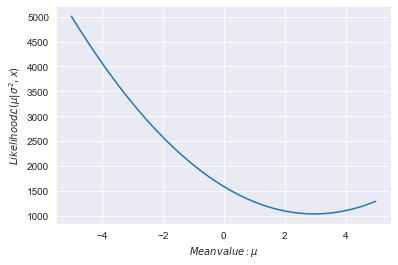

In [216]:
mu = np.arange(-5, 5, 0.01)
likelihood_values = []

for val in mu:
    likelihood_values.append(likelihood(val, sample))
     
plt.plot(mu, likelihood_values)
plt.ylabel("$Likelihood \mathcal{L}(\mu | \sigma^{2}, x)$")
plt.xlabel("$Mean value: \mu$")

## Minimising the likelihood function using scipy.optimize.minimize

In [217]:
initial_guess = rng.random()

lik_model = minimize(likelihood, x0=initial_guess,
                     args=(sample),
                     method="Nelder-Mead",
                     tol=1e-6,
                     options={"disp": True})

lik_model.x

Optimization terminated successfully.
         Current function value: 1035.950498
         Iterations: 28
         Function evaluations: 56


array([2.97374775])

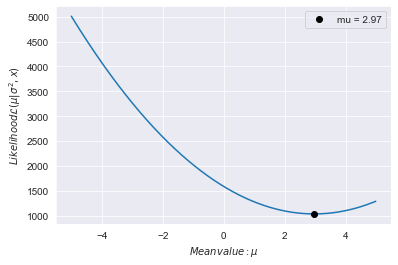

In [218]:
plt.plot(mu, likelihood_values)
plt.ylabel("$Likelihood \mathcal{L}(\mu | \sigma^{2}, x)$")
plt.xlabel("$Mean value: \mu$")
plt.plot(lik_model.x, lik_model.fun, 'ko', label=f"mu = {lik_model.x[0]:.2f}")
plt.legend()

## Setting $\mu$ to be a function of some parameters $a$, $b$

Let $\mu(a, b) = ax + bx^{2}$

In [244]:
def model(params, x):
    a, b = params
    return a*x + b*x**2

In [245]:
# define the univariate Gaussian likelihood
def likelihood(params, x):
    mu = model(params, x)
    sigma = 2
    n = len(x)
    L = (n/2)*np.log(2*np.pi)+(n/2)*np.log(sigma**2)+(1/(2*sigma**2))*sum((x-mu)**2)
    return L

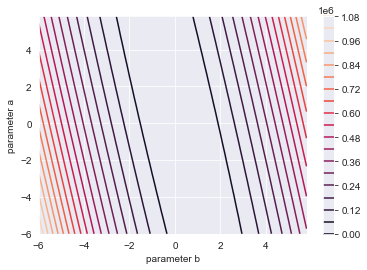

In [247]:
a = np.arange(-6, 6, .2)
b = np.arange(-6, 6, .2)

aa, bb = np.meshgrid(a, b, indexing='ij')

values = np.array((aa, bb)).T.reshape(-1, 2)

likelihood_values = np.zeros(values.shape[0])

for idx, val in enumerate(values):
    likelihood_values[idx] = likelihood(val, sample)
    
likelihood_values

plt.contour(aa, bb, likelihood_values.reshape(aa.shape), 20)
plt.ylabel("parameter a")
plt.xlabel("parameter b")
plt.colorbar()

In [248]:
initial_guess = rng.random(2)

lik_model = minimize(likelihood, x0=initial_guess,
                     args=(sample),
                     method="Nelder-Mead",
                     tol=1e-6,
                     options={"disp": True})

lik_model.x

Optimization terminated successfully.
         Current function value: 806.042857
         Iterations: 60
         Function evaluations: 115


array([9.99999802e-01, 1.74702963e-08])

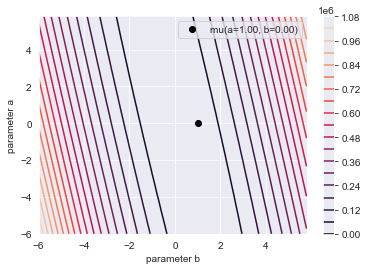

In [249]:
plt.contour(aa, bb, likelihood_values.reshape(aa.shape), 20)
plt.ylabel("parameter a")
plt.xlabel("parameter b")
plt.plot(lik_model.x[0], lik_model.x[1], 'ko', label=f"mu(a={lik_model.x[0]:.2f}, b={lik_model.x[1]:.2f})")
plt.legend()
plt.colorbar()